In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Define paths to the training data file
data_path = 'data.csv'

all_data = pd.read_csv(data_path)

In [2]:
all_data.loc[all_data['class']=='no_droop','class'] = 0.0
all_data.loc[all_data['class']=='droop','class'] = 1.0

all_data['class'] = all_data['class'].astype(float)

X = all_data.iloc[:,:-1].values
y = all_data.iloc[:,-1]

In [3]:
X.shape, y.shape

((471, 9), (471,))

In [4]:
# Split training data and targets into a 90% portion (new training set) and a 10% portion (new test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 9), (71, 9), (400,), (71,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.83


In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.86


In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.83


In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.80
Accuracy of GNB classifier on test set: 0.72


In [11]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.85


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[23  3]
 [ 8 37]]
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81        26
         1.0       0.93      0.82      0.87        45

    accuracy                           0.85        71
   macro avg       0.83      0.85      0.84        71
weighted avg       0.86      0.85      0.85        71



In [14]:
sns.heatmap(confusion_matrix(y_test, pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['No droop','Droop'],yticklabels=['No droop','Droop'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [15]:
import pickle

pickle.dump(svm, open("face_model.sav", 'wb'))

In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from numpy import arange


#using the same data set created for k-Fold => X_train, Y_train

#Setup and configure settings for Repeated k-Fold CV (k-folds=10, repeats=10)
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

repeated_svm = SVC()
scores = cross_val_score(repeated_svm, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)

#define model
lcv = LogisticRegressionCV(cv=rcv, scoring='accuracy')

lcv.fit(X_train, y_train)

C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wonuo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LogisticRegressionCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
                     scoring='accuracy')

In [46]:
print('Accuracy of LCV classifier on training set: {:.2f}'
     .format(lcv.score(X_train, y_train)))
print('Accuracy of LCV classifier on test set: {:.2f}'
     .format(lcv.score(X_test, y_test)))

Accuracy of LCV classifier on training set: 0.84
Accuracy of LCV classifier on test set: 0.86


In [47]:
print(mean(scores))

0.825


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


param_grid  = {'n_estimators': [10, 30, 60, 90],'max_features':[3, 5, 7]} 
forest_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=forest_cv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

forest_reg=RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], 
            max_features=grid_search.best_params_['max_features'],
             random_state=1).fit(X_train, y_train)

print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(forest_reg.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(forest_reg.score(X_test, y_test)))


{'max_features': 3, 'n_estimators': 90}
Accuracy of RandomForest classifier on training set: 0.94
Accuracy of RandomForest classifier on test set: 0.72


In [17]:

# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC

 
# evaluate a model with a given number of repeats
def evaluate_model(repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model = SVC()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores
 
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
 # evaluate using a given number of repeats
 scores = evaluate_model(r)
 # summarize
 print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
 # store
 results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

>1 mean=0.8250 se=0.017
>2 mean=0.8238 se=0.013
>3 mean=0.8242 se=0.011
>4 mean=0.8237 se=0.010
>5 mean=0.8255 se=0.009
>6 mean=0.8250 se=0.008
>7 mean=0.8246 se=0.008
>8 mean=0.8244 se=0.008
>9 mean=0.8247 se=0.007
>10 mean=0.8250 se=0.007
>11 mean=0.8250 se=0.006
>12 mean=0.8248 se=0.006
>13 mean=0.8246 se=0.006
>14 mean=0.8246 se=0.006
>15 mean=0.8243 se=0.005


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [23]:
# construct a multi layer convolutional neural network
model = Sequential([
    # passive input layer, may or may not be weighted, input shape matches the shape of data and targets
    # input is given as array / tensor of 1 dimension
    InputLayer(input_shape=(9, )),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),

    #Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [24]:
# configure the model for training using anoptimizer that uses the Adam algorithm
# the models accuracy is evaluated during training and testing
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model_name = "model.h5"
# monitors the model's total loss and save the model considered the "best" 
# the "best" model is determined by minimizing the total loss  
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

# stop training the model when the model's total loss is improved on by any value > 0
# if no improvement occurs after 2 epochs then training will be stopped
# restores the model weights from the epoch with the best value
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 2, verbose = 1, restore_best_weights=True)

In [26]:
# fit the model to the training data using 8 iterations and use the testing data to validate it 
history = model.fit(X_train, y_train, epochs=8, verbose=1, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/8
 1/13 [=>............................] - ETA: 6s - loss: 0.6040 - accuracy: 0.6562
Epoch 1: val_loss improved from inf to 0.61082, saving model to model.h5
13/13 [==============================] - 1s 18ms/step - loss: 0.6102 - accuracy: 0.6375 - val_loss: 0.6108 - val_accuracy: 0.6338
Epoch 2/8
 1/13 [=>............................] - ETA: 0s - loss: 0.6015 - accuracy: 0.6562
Epoch 2: val_loss improved from 0.61082 to 0.59857, saving model to model.h5
13/13 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.6375 - val_loss: 0.5986 - val_accuracy: 0.6338
Epoch 3/8
 1/13 [=>............................] - ETA: 0s - loss: 0.5606 - accuracy: 0.6250
Epoch 3: val_loss improved from 0.59857 to 0.58705, saving model to model.h5
13/13 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.6375 - val_loss: 0.5870 - val_accuracy: 0.6338
Epoch 4/8
 1/13 [=>............................] - ETA: 0s - loss: 0.5445 - accuracy: 0.6875
Epoch 4: val_

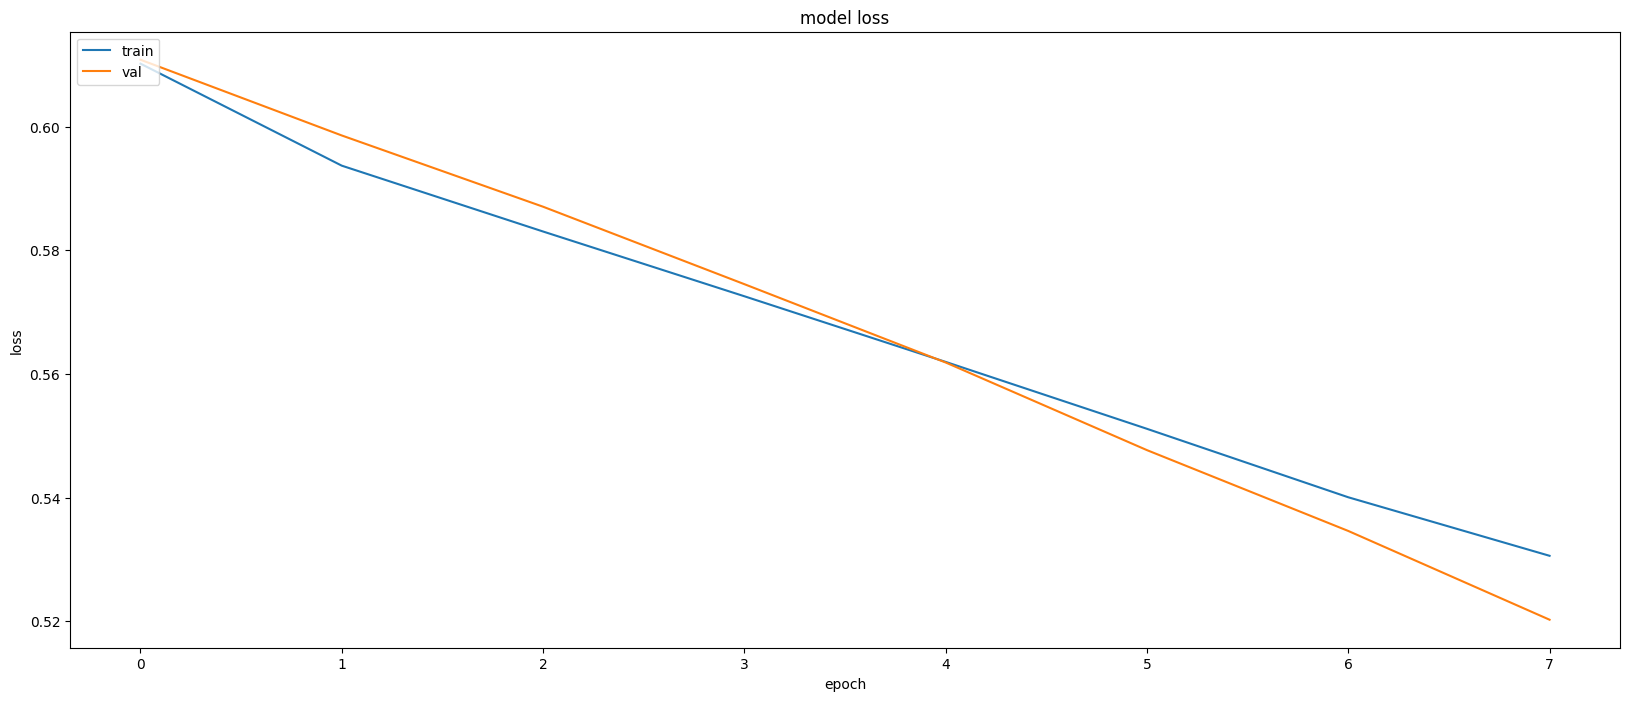

In [27]:
plt.figure(figsize=(20,8))
# loss is the value of cost function for the training data
plt.plot(history.history['loss'])
#val_loss is the value of cost function for the validation data
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

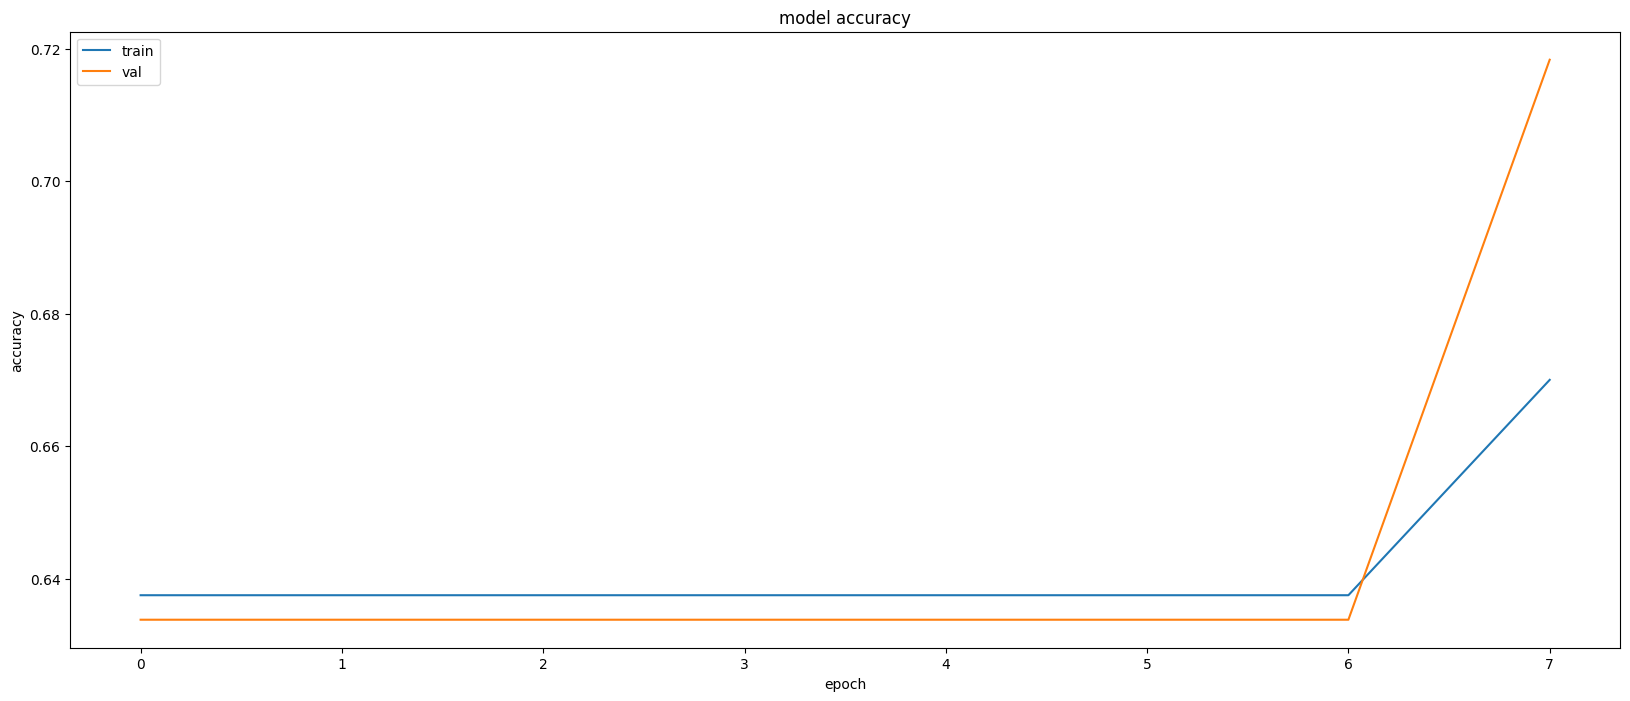

In [28]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))

3/3 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7183
score on test: 0.7183098793029785
13/13 [==============================] - 0s 917us/step - loss: 0.5257 - accuracy: 0.7150
score on train: 0.7149999737739563
